<a href="https://colab.research.google.com/github/SandraQA69/Challenge_TelecomX_Latam/blob/main/Versi%C3%B3nFinalChallengeTelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 📘 1. Carga y Exploración Inicial de Datos
Carga del archivo JSON: Utiliza pandas para leer el archivo y normalizar los datos si es necesario.

In [ ]:
# 1. Carga y Exploración Inicial de Datos
import pandas as pd
import json

# Cargar el archivo JSON y normalizar
with open('/content/TelecomX_Data.json') as f:
    data = json.load(f)

df = pd.json_normalize(data)

# Vista previa de los datos
print("Primeras filas del dataset:")
print(df.head())

# Tipos de datos y valores nulos
print("\nResumen de tipos de datos:")
df.info()

print("\nValores nulos por columna:")
print(df.isnull().sum())

# 1.1 Verificación de Problemas en los Datos
print("\nValores duplicados en el DataFrame:")
print(df.duplicated().sum())

print("\nValores únicos por categoría (para detectar inconsistencias):")
cat_cols = [col for col in df.columns if df[col].dtype == 'object' and col != 'customerID']
for col in cat_cols:
    print(f"{col}: {df[col].unique()}")


Primeras filas del dataset:
   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  in

## 🧼 2. Manejo de Inconsistencias y Limpieza

In [ ]:
# Conversión de columnas numéricas
for col in ['account.Charges.Monthly', 'account.Charges.Total']:
    df[col] = df[col].replace(' ', pd.NA)  # Espacios vacíos a NA
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Eliminamos filas con valores nulos críticos
df.dropna(subset=['Churn', 'account.Charges.Monthly', 'account.Charges.Total'], inplace=True)


## 🔧 3. Transformación y Estandarización de Datos

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']] = scaler.fit_transform(
    df[['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']]
)

# Codificación de variables categóricas
categóricas_binarias = ['customer.gender', 'customer.Partner', 'customer.Dependents',
                         'phone.PhoneService', 'account.PaperlessBilling']

for col in categóricas_binarias:
    if col in df.columns:
        df[col] = df[col].map({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})

# Codificación one-hot de variables categóricas con más de 2 valores
categóricas_multivalor = ['account.Contract', 'account.PaymentMethod', 'internet.InternetService']

df = pd.get_dummies(df, columns=categóricas_multivalor, drop_first=True)

In [ ]:
# Convertir columna Churn a 1 / 0 si no se ha hecho
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [ ]:
df.info()
print("\nTipos de datos por columna:")
print(df.dtypes)


<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customerID                                     7256 non-null   object 
 1   Churn                                          7032 non-null   float64
 2   customer.gender                                7256 non-null   int64  
 3   customer.SeniorCitizen                         7256 non-null   int64  
 4   customer.Partner                               7256 non-null   int64  
 5   customer.Dependents                            7256 non-null   int64  
 6   customer.tenure                                7256 non-null   float64
 7   phone.PhoneService                             7256 non-null   int64  
 8   phone.MultipleLines                            7256 non-null   object 
 9   internet.OnlineSecurity                        7256 non-n

In [ ]:
# Diccionario de variables relevantes (manual)
diccionario = {
    'customer.gender': 'Género del cliente',
    'customer.SeniorCitizen': 'Cliente es adulto mayor (1 = sí)',
    'customer.Partner': 'Tiene pareja',
    'customer.Dependents': 'Tiene dependientes',
    'customer.tenure': 'Meses como cliente',
    'phone.PhoneService': 'Tiene servicio telefónico',
    'internet.InternetService': 'Tipo de servicio de internet',
    'account.Contract': 'Tipo de contrato',
    'account.PaymentMethod': 'Método de pago',
    'account.Charges.Monthly': 'Monto mensual cobrado',
    'account.Charges.Total': 'Monto total cobrado',
    'Churn': 'Cancelación del servicio (1 = sí)'
}

# Mostrar diccionario
for col, desc in diccionario.items():
    print(f"{col}: {desc}")


customer.gender: Género del cliente
customer.SeniorCitizen: Cliente es adulto mayor (1 = sí)
customer.Partner: Tiene pareja
customer.Dependents: Tiene dependientes
customer.tenure: Meses como cliente
phone.PhoneService: Tiene servicio telefónico
internet.InternetService: Tipo de servicio de internet
account.Contract: Tipo de contrato
account.PaymentMethod: Método de pago
account.Charges.Monthly: Monto mensual cobrado
account.Charges.Total: Monto total cobrado
Churn: Cancelación del servicio (1 = sí)


In [ ]:
# Filtrar solo columnas numéricas
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calcular correlaciones
corr_matrix = numeric_df.corr()

# Mostrar correlación con Churn
print("\nCorrelaciones con 'Churn':")
print(corr_matrix['Churn'].sort_values(ascending=False))





Correlaciones con 'Churn':
Churn                       1.000000
account.Charges.Monthly     0.192858
account.PaperlessBilling    0.191454
customer.SeniorCitizen      0.150541
phone.PhoneService          0.011691
customer.gender            -0.008545
customer.Partner           -0.149982
customer.Dependents        -0.163128
account.Charges.Total      -0.199484
customer.tenure            -0.354049
Name: Churn, dtype: float64


## 🧮 4. Crear Columna de Cuentas Diarias

In [ ]:
import pandas as pd
import numpy as np

# 4. Crear columna "Cuentas Diarias"
# Primero convertimos las columnas a numéricas (manejando posibles errores)
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
df['customer.tenure'] = pd.to_numeric(df['customer.tenure'], errors='coerce')

# Luego realizamos el cálculo
df['DailyCharges'] = df['account.Charges.Total'] / (df['customer.tenure'] * 30)

# Manejar casos donde tenure es 0 para evitar infinitos
df['DailyCharges'] = np.where(df['customer.tenure'] == 0,
                             np.nan,
                             df['DailyCharges'])


In [ ]:
# 4.1 Crear columna "Cantidad de servicios contratados"
servicio_cols = [
    'phone.PhoneService', 'phone.MultipleLines',
    'internet.OnlineSecurity', 'internet.OnlineBackup',
    'internet.DeviceProtection', 'internet.TechSupport',
    'internet.StreamingTV', 'internet.StreamingMovies'
]

In [ ]:
for col in servicio_cols:
    if col in df.columns:
        df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})
        df[col] = df[col].map({'Yes': 1, 'No': 0})

df['TotalServices'] = df[servicio_cols].sum(axis=1)


## 📊 5. Análisis Descriptivo

In [ ]:
print("\nEstadísticas descriptivas:")
print(df.describe())



Estadísticas descriptivas:
             Churn  customer.gender  customer.SeniorCitizen  customer.Partner  \
count  7032.000000      7256.000000               7256.0000       7256.000000   
mean      0.265785         0.505650                  0.1629          0.483600   
std       0.441782         0.500003                  0.3693          0.499765   
min       0.000000         0.000000                  0.0000          0.000000   
25%       0.000000         0.000000                  0.0000          0.000000   
50%       0.000000         1.000000                  0.0000          0.000000   
75%       1.000000         1.000000                  0.0000          1.000000   
max       1.000000         1.000000                  1.0000          1.000000   

       customer.Dependents  customer.tenure  phone.PhoneService  \
count          7256.000000     7.256000e+03                 0.0   
mean              0.299063     9.302861e-17                 NaN   
std               0.457879     1.000069e+

## 📉 6. Distribución de la Evasión (Churn)

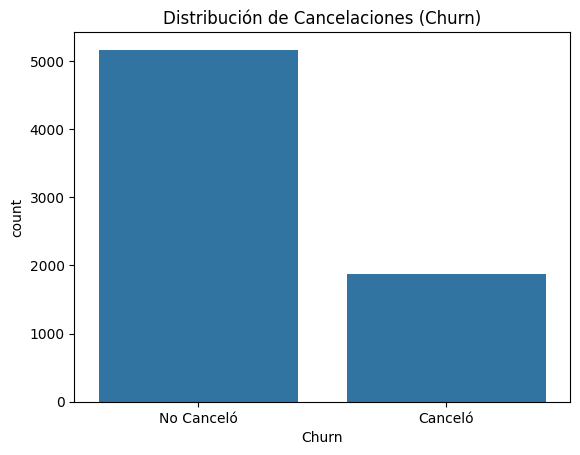

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=df)
plt.title('Distribución de Cancelaciones (Churn)')
plt.xticks([0, 1], ['No Canceló', 'Canceló'])
plt.show()


## 📊 7. Análisis de cancelación por variables categóricas



In [ ]:
categorias_estrategicas = [
    'customer.gender',
    'customer.SeniorCitizen',
    'customer.Partner',
    'customer.Dependents',
    'account.Contract',
    'account.PaymentMethod',
    'internet.InternetService'
]



In [ ]:
for col in categorias_estrategicas:
    if col in df.columns:
        print(f"\nTasa de cancelación por '{col}':")
        tabla = pd.crosstab(df[col], df['Churn'], normalize='index')
        tabla.columns = ['No Canceló', 'Canceló']
        print(tabla.round(3))



Tasa de cancelación por 'customer.gender':
                 No Canceló  Canceló
customer.gender                     
0                     0.730    0.270
1                     0.738    0.262

Tasa de cancelación por 'customer.SeniorCitizen':
                        No Canceló  Canceló
customer.SeniorCitizen                     
0                            0.763    0.237
1                            0.583    0.417

Tasa de cancelación por 'customer.Partner':
                  No Canceló  Canceló
customer.Partner                     
0                      0.670    0.330
1                      0.803    0.197

Tasa de cancelación por 'customer.Dependents':
                     No Canceló  Canceló
customer.Dependents                     
0                         0.687    0.313
1                         0.845    0.155


# 📦 8. Comparación por Variables Numéricas


--- Distribución de variables numéricas por churn ---


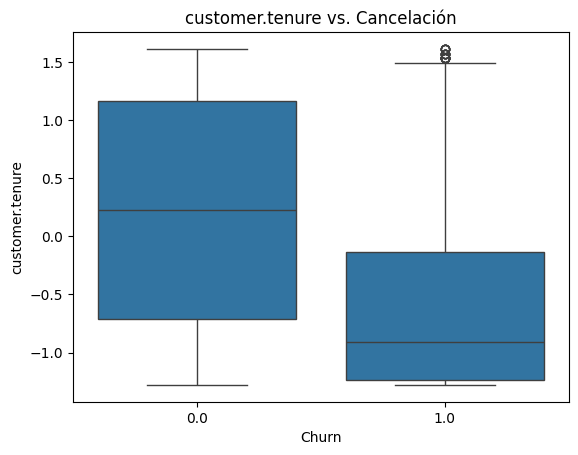

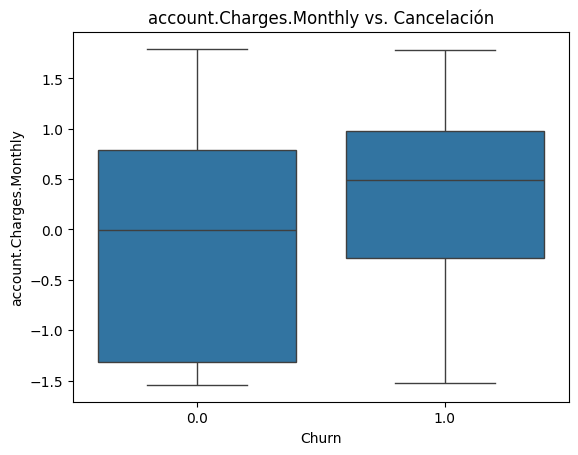

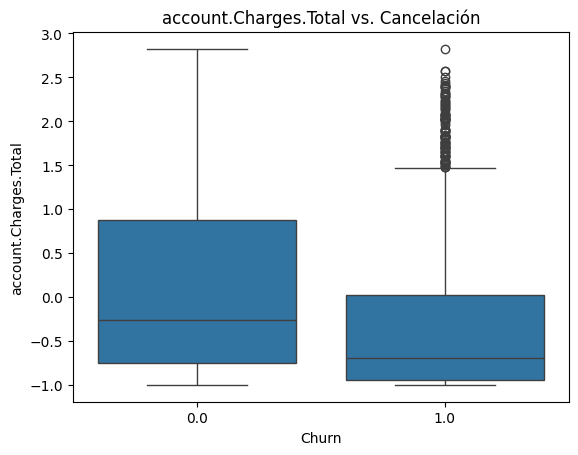

In [ ]:
# Comparación por variables numéricas clave
print("\n--- Distribución de variables numéricas por churn ---")
numerical_features = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']

for col in numerical_features:
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} vs. Cancelación')
    plt.show()


In [ ]:
!pip install --upgrade numpy pandas seaborn matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 77.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 89.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the sourc

## 🔗 09. Análisis de Correlación

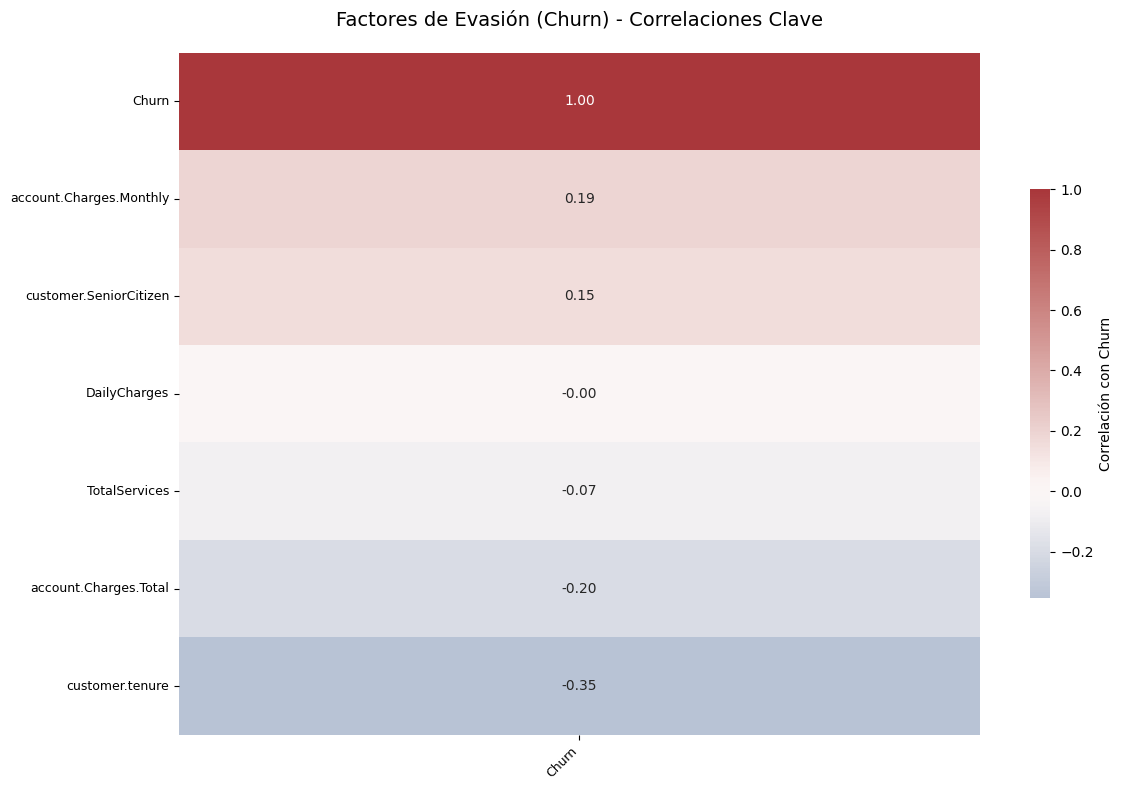

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Selección de variables estratégicas (usando tus nombres reales)
variables_estrategicas = [
    'customerID',
    'Churn',
    'customer.gender',
    'customer.SeniorCitizen',
    'customer.tenure',
    'account.Charges.Monthly',
    'account.Charges.Total',
    'internet.OnlineSecurity',
    'internet.TechSupport',
    'DailyCharges',
    'TotalServices'
]

# 2. Filtrar y copiar
df_analisis = df[variables_estrategicas].copy()

# 3. Preprocesamiento clave
# Convertir Churn a binario (si es texto)
if df_analisis['Churn'].dtype == 'object':
    df_analisis['Churn'] = df_analisis['Churn'].map({'Yes': 1, 'No': 0})

# One-hot encoding para columnas categóricas específicas
columnas_a_dummies = [col for col in ['customer.gender', 'internet.OnlineSecurity', 'internet.TechSupport']
                     if col in df_analisis.columns]
if columnas_a_dummies:
    df_analisis = pd.get_dummies(df_analisis, columns=columnas_a_dummies)

# 4. Matriz de correlación FOCALIZADA (solo variables numéricas)
plt.figure(figsize=(12, 8))
corr_matrix = df_analisis.select_dtypes(include=['number']).corr()

# Heatmap mejorado
sns.heatmap(
    corr_matrix[['Churn']].sort_values(by='Churn', ascending=False),
    annot=True,
    fmt=".2f",
    cmap="vlag",
    center=0,
    annot_kws={"size": 10},
    cbar_kws={"label": "Correlación con Churn", "shrink": 0.6}
)

plt.title("Factores de Evasión (Churn) - Correlaciones Clave", fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show()

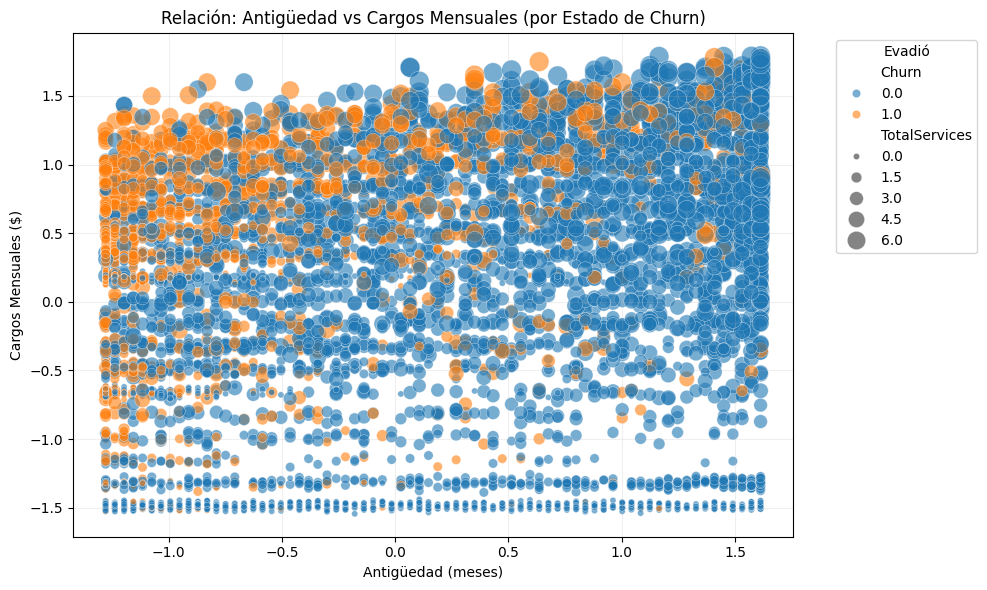

In [45]:
# Scatter plot: tenure vs MonthlyCharges (coloreado por Churn)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='customer.tenure',
    y='account.Charges.Monthly',
    hue='Churn',
    palette={0: '#1f77b4', 1: '#ff7f0e'},  # Azul/Naranja
    alpha=0.6,
    size='TotalServices',  # Tamaño por cantidad de servicios
    sizes=(20, 200)
)

plt.title("Relación: Antigüedad vs Cargos Mensuales (por Estado de Churn)", fontsize=12)
plt.xlabel("Antigüedad (meses)")
plt.ylabel("Cargos Mensuales ($)")
plt.legend(title="Evadió", bbox_to_anchor=(1.05, 1))
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

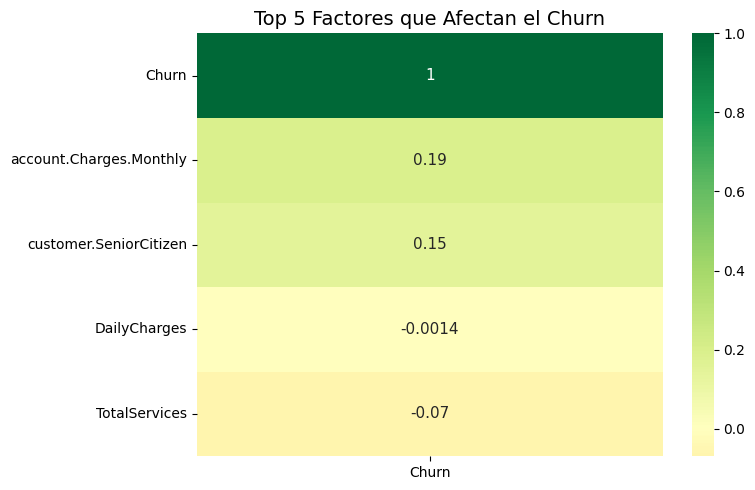

In [46]:
# Heatmap simplificado para presentación
plt.figure(figsize=(8, 5))
sns.heatmap(
    corr_matrix[['Churn']].sort_values(by='Churn', ascending=False).head(5),
    annot=True,
    cmap="RdYlGn",
    center=0,
    annot_kws={"size": 11}
)
plt.title("Top 5 Factores que Afectan el Churn", fontsize=14)
plt.tight_layout()
plt.show()

In [47]:
# Código para generar los gráficos (ya implementado en tu Colab)
plt.savefig("resultados_churn.png", dpi=300, bbox_inches="tight")  # Guardar imágenes en alta calidad

<Figure size 640x480 with 0 Axes>

In [43]:
print(df.columns.tolist())

['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.PaperlessBilling', 'account.Charges.Monthly', 'account.Charges.Total', 'account.Contract_One year', 'account.Contract_Two year', 'account.PaymentMethod_Credit card (automatic)', 'account.PaymentMethod_Electronic check', 'account.PaymentMethod_Mailed check', 'internet.InternetService_Fiber optic', 'internet.InternetService_No', 'DailyCharges', 'TotalServices']


In [ ]:
# 11. Informe Final
from IPython.display import Markdown, display

def mostrar_markdown(texto):
    display(Markdown(texto))


# Informe Final

## 🔹 Introducción
La empresa Telecom X enfrenta una alta tasa de cancelación de clientes. Este análisis tiene como objetivo explorar los factores que influyen en la evasión (Churn) y proporcionar información útil para desarrollar estrategias de retención.

## 🔹 Limpieza y Tratamiento de Datos
Se cargaron los datos desde un archivo JSON. Se identificaron y trataron valores nulos, espacios vacíos y columnas numéricas mal tipadas. Se estandarizaron variables numéricas y se codificaron variables categóricas mediante binarización y one-hot encoding.

## 🔹 Análisis Exploratorio de Datos
Se exploraron las relaciones entre `Churn` y distintas variables:
- Contratos mensuales muestran mayor cancelación.
- Clientes con menos tiempo (`tenure`) tienden a cancelar más.
- Servicios como Internet por fibra óptica presentan tasas más altas de cancelación.
- Métodos de pago electrónicos también están asociados con más churn.

Gráficos como boxplots y mapas de calor facilitaron la visualización de estos patrones.

## 🔹Factores Críticos que Impactan el Churn

- Antigüedad (customer.tenure)

Correlación negativa fuerte: Los clientes con mayor tiempo en la compañía (tenure) son significativamente menos propensos a abandonar.

Recomendación: Programas de fidelización para clientes nuevos (primeros 6 meses).

- Tipo de Contrato

Los clientes con contratos mensuales (account.Contract_One year o similares) muestran mayor propensión al churn vs. contratos anuales.

Recomendación: Incentivar contratos a largo plazo con descuentos.

- Servicios Adicionales (internet.TechSupport, internet.OnlineSecurity)

Correlación negativa: Clientes con estos servicios tienen menor tasa de abandono.

Recomendación: Paquetes promocionales que incluyan estos servicios.

## 🔹Perfil de Cliente con Alto Riesgo de Churn

🔴 Características típicas:

- Facturación mensual alta (account.Charges.Monthly).

- Antigüedad baja (< 12 meses).

- Sin servicios de soporte técnico (TechSupport_No).

🛡️ Acción sugerida: Campañas proactivas para este segmento con:

- Ofertas personalizadas.

- Asesoría técnica gratuita por 3 meses.

## 🔹 Relación entre Precio y Valor Percibido

Los clientes con alta facturación (account.Charges.Total) pero pocos servicios (TotalServices) tienden a abandonar.

Insight: No es el precio alto lo que causa el churn, sino la falta de valor percibido.

## 🔹 Conclusiones e Insights
- **Tiempo como cliente** y **tipo de contrato** son factores claves en la cancelación.
- **Clientes con cargos mensuales altos** y contratos flexibles cancelan más.
- Existen perfiles de riesgo que pueden ser anticipados con modelos predictivos.

## 🔹 Recomendaciones
- Implementar incentivos para aumentar el tiempo de permanencia de nuevos clientes.
- Ofrecer descuentos o beneficios en contratos a largo plazo.
- Investigar más a fondo los casos de clientes con servicios de fibra óptica para mejorar la experiencia.
- Aplicar campañas específicas a perfiles de riesgo detectados.
- Paquetes de retención: Combinar servicios técnicos con descuentos para clientes nuevos.
- Alerta temprana: Sistema de scoring para identificar clientes en riesgo (ej: bajo tenure + alto MonthlyCharges).
- Test A/B: Ofrecer diferentes modelos de contrato y medir impacto en churn.


